In [124]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import torchvision.transforms as transforms  # Transformations we can perform on our dataset
from sklearn import datasets
from torch.utils.data import (
    Dataset,TensorDataset,
    DataLoader,
)  # Gives easier dataset managment and creates mini batches

from datetime import datetime
from torch.optim.lr_scheduler import StepLR

from sklearn.model_selection import train_test_split
plt.style.use('seaborn')

In [125]:
# A function to encapsulate the training loop
def batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs):
   
    train_losses = np.zeros(epochs)
    test_losses = np.zeros(epochs)

    for it in range(epochs):
        model.train()
        t0 = datetime.now()
        train_loss = []
        
        for inputs, targets in train_loader:     
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())
        
        model.eval()
        test_loss = []
        for inputs, targets in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss.append(loss.item())
    

        # Save losses
        train_losses[it] = np.mean(train_loss) 
        test_losses[it] =  np.mean(test_loss)

        if (it + 1) % 25 == 0:
          print(f'Epoch {it+1}/{epochs}, Train Loss: {train_losses[it]:.4f}')
          print(f'Epoch {it+1}/{epochs}, Test Loss: {test_losses[it]:.4f}')

    plt.figure()
    plt.plot(train_losses)
    plt.plot(test_losses)
    plt.legend(['Training MSE', 'Validation MSE'])
    return #train_losses, test_losses



In [126]:
# Make the dataset
N = 1000
X = np.random.random((N, 2)) * 6 - 3 # uniformly distributed between (-3, +3)
Y = (2*X[:,0]) + (61*X[:,1]) #np.cos(2*X[:,0]) + np.cos(3*X[:,1])

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train = torch.from_numpy(x_train.astype(np.float32))
Y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1, 1))

X_test = torch.from_numpy(x_train.astype(np.float32))
Y_test = torch.from_numpy(y_train.astype(np.float32).reshape(-1, 1))

train_dataset = TensorDataset(X_train,Y_train)
test_dataset = TensorDataset(X_test,Y_test)

train_loader = DataLoader(dataset=train_dataset , batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset , batch_size=batch_size, shuffle=True)

batch_size =20

epochs=200

# Build the model
model = nn.Sequential(
#    nn.Linear(2, 128),
 #   nn.ReLU(),
  #  nn.Linear(128, 1)
    nn.Linear(2,1)
)

# model=nn.Linear(2,1)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

This implements the function:

$$ y = \cos(2x_1) + cos(3x_2) $$

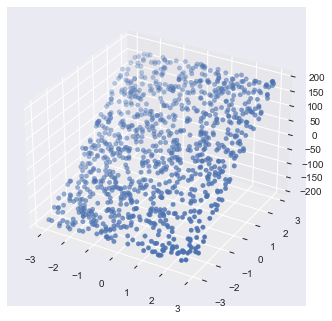

In [127]:
# Plot it
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
# plt.show()

Epoch 25/200, Train Loss: 65.4355
Epoch 25/200, Test Loss: 55.2441
Epoch 50/200, Train Loss: 0.0007
Epoch 50/200, Test Loss: 0.0005
Epoch 75/200, Train Loss: 0.0000
Epoch 75/200, Test Loss: 0.0000
Epoch 100/200, Train Loss: 0.0000
Epoch 100/200, Test Loss: 0.0000
Epoch 125/200, Train Loss: 0.0000
Epoch 125/200, Test Loss: 0.0000
Epoch 150/200, Train Loss: 0.0000
Epoch 150/200, Test Loss: 0.0000
Epoch 175/200, Train Loss: 0.0000
Epoch 175/200, Test Loss: 0.0000
Epoch 200/200, Train Loss: 0.0000
Epoch 200/200, Test Loss: 0.0000


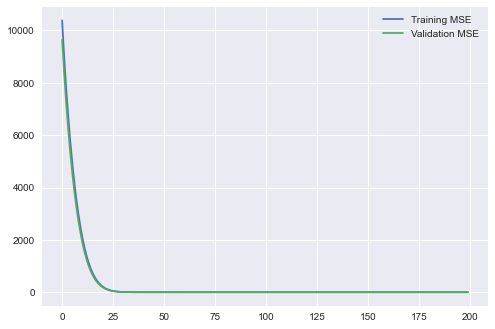

In [128]:
batch_gd(model, criterion, optimizer, train_loader, train_loader, epochs)


In [129]:
for p in model.named_parameters():
    print(p)

('0.weight', Parameter containing:
tensor([[ 2.0000, 61.0000]], requires_grad=True))
('0.bias', Parameter containing:
tensor([5.5211e-06], requires_grad=True))


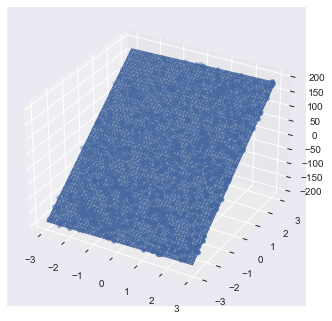

In [130]:
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
with torch.no_grad():
  line = np.linspace(-3, 3, 50)
  xx, yy = np.meshgrid(line, line)
  Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
  Xgrid_torch = torch.from_numpy(Xgrid.astype(np.float32))
  Yhat = model(Xgrid_torch).numpy().flatten()
  ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
  plt.show()

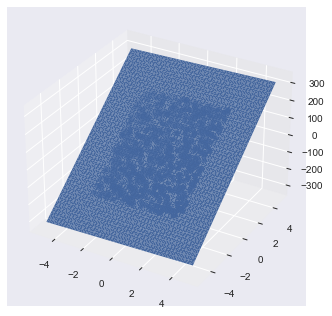

In [131]:
# Can it extrapolate?
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
with torch.no_grad():
  line = np.linspace(-5, 5, 50)
  xx, yy = np.meshgrid(line, line)
  Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
  Xgrid_torch = torch.from_numpy(Xgrid.astype(np.float32))
  Yhat = model(Xgrid_torch).numpy().flatten()
  ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
  plt.show()